# **Manufacturing Team Performance : EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("..\Data\manufacturing_data.csv")
df.head(5)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


### **Production Efficiency Dataset Description**

| Column | Meaning | Example | Notes |
|--------|---------|---------|-------|
| **recordDate** | The date the team's performance was logged | `2/24/2015` | Helps track trends over time. Can extract month, day, or quarter features. |
| **fiscalQuarter** | Which quarter of the year the date belongs to | `Q4`, `Q3` | Categorical. Could affect performance (seasonality, targets). |
| **productionDept** | Name of the department | `Stitching Unit`, `Finishing & Quality` | Different departments may have different efficiency norms. |
| **dayOfWeek** | Day of the week | `Tuesday`, `Monday` | Can show weekly patterns (e.g., Mondays lower efficiency). |
| **team** | Unique team ID | `Line-S1`, `Line-F3` | For tracking team-level performance differences. |
| **plannedEfficiency** | Target efficiency for the day (0–1 scale) | `0.6`, `0.8` | What management expects. Can compare with actual efficiency. |
| **standardMinuteValue** | Time expected to produce **one unit** | `22.53`, `11.41` | Shows task difficulty or time intensity. |
| **workInProgress** | Number of units being worked on that day | `708`, `1028` | Higher workload may impact efficiency. |
| **overtimeMinutes** | Minutes beyond regular shift | `5040`, `4380` | Extra work may boost or hurt efficiency depending on fatigue. |
| **performanceBonus** | Monetary bonus earned by team | `0`, `50` | Incentive can influence productivity. |
| **idleMinutes** | Minutes team was idle (waiting, equipment issues) | `0.0` | Idle time typically reduces efficiency. |
| **idleWorkers** | Number of workers idle during downtime | `0` | Higher idle workers → lower efficiency. |
| **styleChangeCount** | How many garment style changes occurred | `Minor Style Revision`, `No Style Change` | Style changes can slow production; can encode as numeric. |
| **workerCount** | Total active workers in the team | `42`, `31` | Larger teams may have higher output, but efficiency per worker may vary. |
| **efficiencyScore** | Actual efficiency achieved (target variable) | `0.2682`, `0.8003` | Continuous value between 0 and 1. This is what we want to predict. |

In [ ]:
df.tail(5)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
1192,3/3/2015,Q1,Finishing & Quality,Tuesday,Line-F2,0.70,4.60,NaN,3360,0,0.0,0,No Style Change,8.0,0.354444
1193,3/7/2015,Q1,Finishing & Quality,Saturday,Line-F3,0.50,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.797500
1194,3/9/2015,Q2,Finishing & Quality,Monday,Line-F2,0.60,3.94,NaN,0,2880,0.0,0,No Style Change,12.0,0.864343
1195,2/19/2015,Q3,Stitching Unit,Thursday,Line-C1,0.75,30.10,444.0,0,0,5.0,20,Minor Style Revision,59.0,0.611141
1196,3/8/2015,Q2,Finishing & Quality,Sunday,Line-Q2,0.70,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.441042


In [ ]:
df.shape

(1197, 15)

In [ ]:
df.columns

Index(['recordDate', 'fiscalQuarter', 'productionDept', 'dayOfWeek', 'team',
       'plannedEfficiency', 'standardMinuteValue', 'workInProgress',
       'overtimeMinutes', 'performanceBonus', 'idleMinutes', 'idleWorkers',
       'styleChangeCount', 'workerCount', 'efficiencyScore'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [ ]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [ ]:
df.dtypes

recordDate              object
fiscalQuarter           object
productionDept          object
dayOfWeek               object
team                    object
plannedEfficiency      float64
standardMinuteValue    float64
workInProgress         float64
overtimeMinutes          int64
performanceBonus         int64
idleMinutes            float64
idleWorkers              int64
styleChangeCount        object
workerCount            float64
efficiencyScore        float64
dtype: object

In [ ]:
missing_values=df.isnull().sum()

missing_values

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

In [ ]:
df['workInProgress'].fillna(df['workInProgress'].median(),inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_17580\2118970215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workInProgress'].fillna(df['workInProgress'].median(),inplace=True)


In [ ]:
df['workInProgress'].isnull().sum()

np.int64(0)

In [ ]:
df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')

In [ ]:
df.head(1)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2015-02-24,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214


In [ ]:
df.isnull().sum()

recordDate             0
fiscalQuarter          0
productionDept         0
dayOfWeek              0
team                   0
plannedEfficiency      0
standardMinuteValue    0
workInProgress         0
overtimeMinutes        0
performanceBonus       0
idleMinutes            0
idleWorkers            0
styleChangeCount       0
workerCount            0
efficiencyScore        0
dtype: int64

### **Univariate Analysis**

Text(0.5, 1.0, 'Distribution of Efficiency Score')

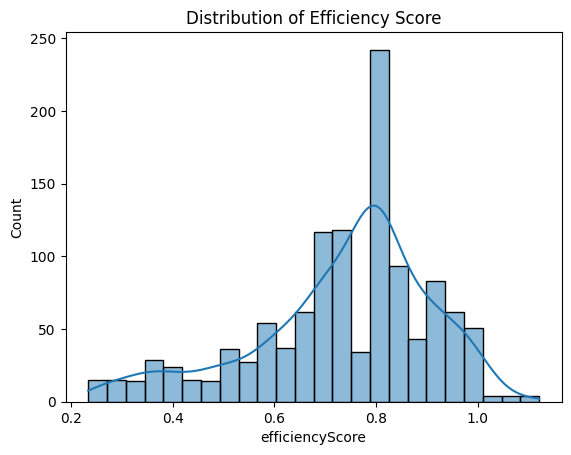

In [ ]:
sns.histplot(df['efficiencyScore'], kde=True)
plt.title("Distribution of Efficiency Score")

Text(0.5, 1.0, 'Planned Efficiency Distribution')

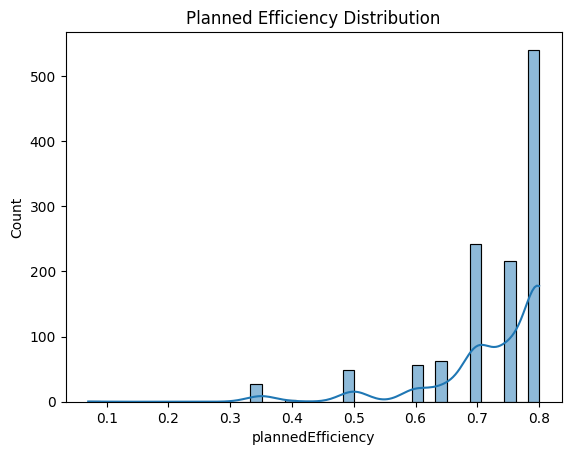

In [ ]:
sns.histplot(df['plannedEfficiency'], kde=True)
plt.title("Planned Efficiency Distribution")

<Axes: xlabel='dayOfWeek', ylabel='Count'>

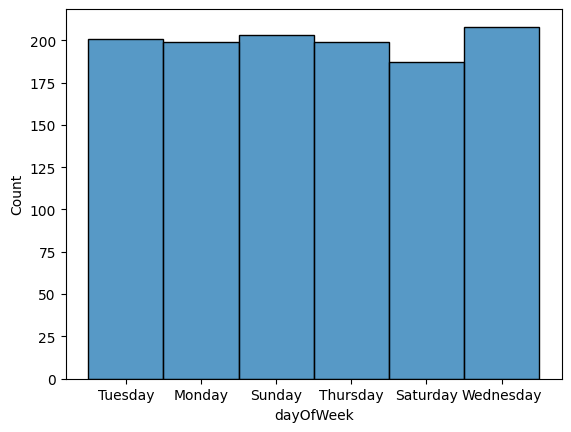

In [ ]:
sns.histplot(df['dayOfWeek'])

<Axes: xlabel='fiscalQuarter', ylabel='Count'>

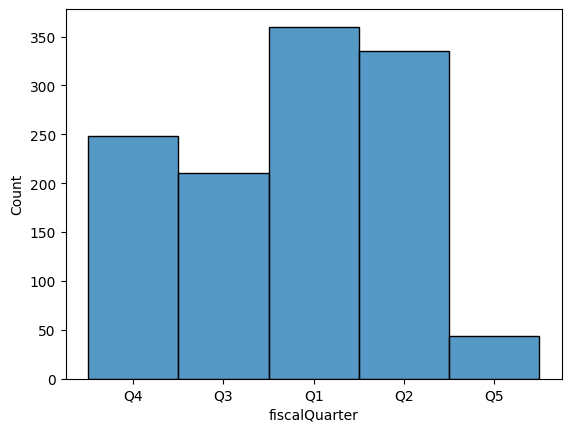

In [ ]:
sns.histplot(df['fiscalQuarter'])

<Axes: xlabel='productionDept', ylabel='Count'>

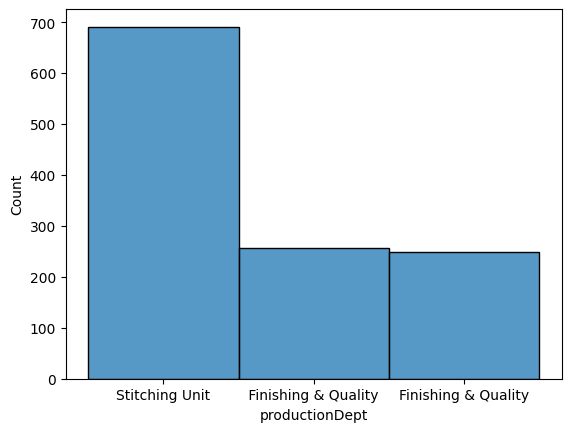

In [ ]:
sns.histplot(df['productionDept'])

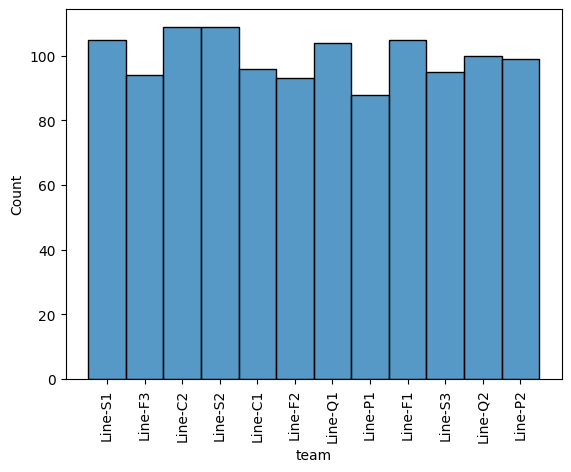

In [ ]:
sns.histplot(df['team'])
plt.xticks(rotation=90)
plt.show()  

### **Bivariate Analysis (Target vs Features)**

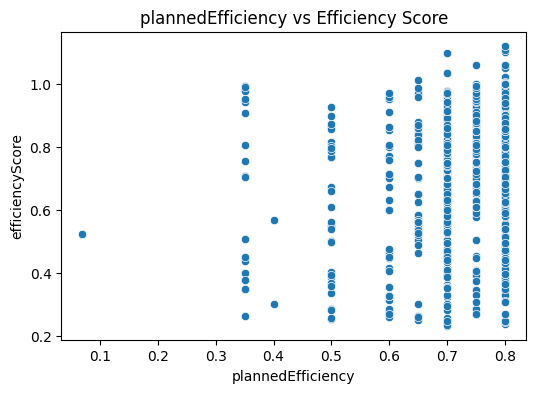

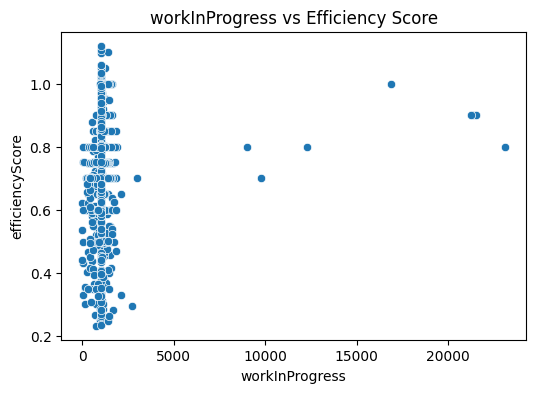

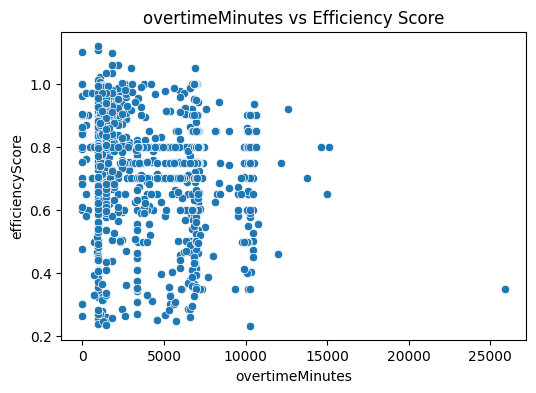

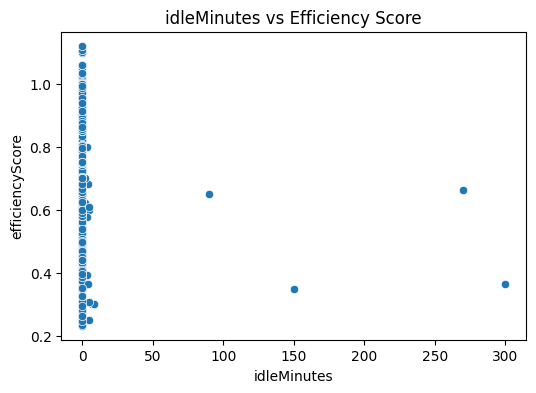

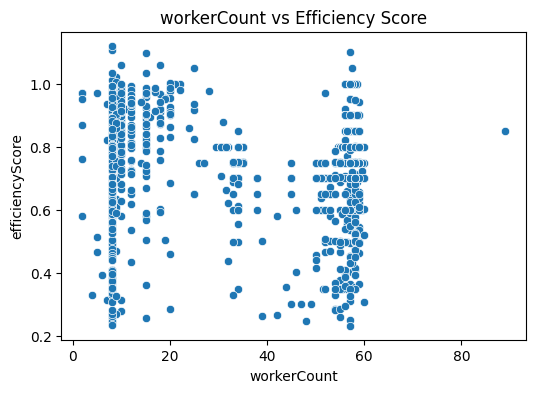

In [ ]:
num_features = ['plannedEfficiency', 'workInProgress', 'overtimeMinutes', 'idleMinutes', 'workerCount']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['efficiencyScore'])
    plt.title(f"{col} vs Efficiency Score")
    plt.show()



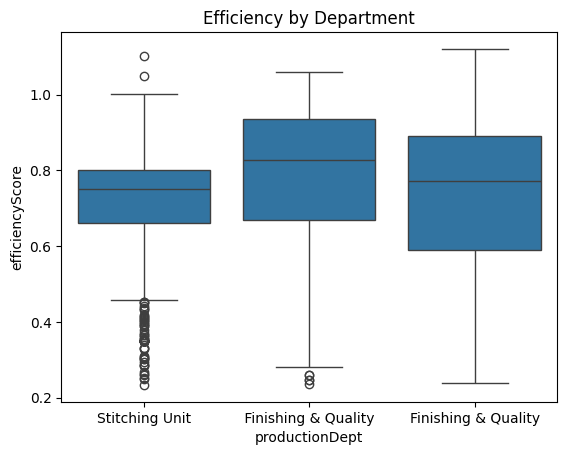

In [ ]:
sns.boxplot(x='productionDept', y='efficiencyScore', data=df)
plt.title("Efficiency by Department")
plt.show()

### **Outlier Detection**

In [ ]:
num_features = ['plannedEfficiency', 'workInProgress', 'overtimeMinutes', 'idleMinutes', 'workerCount']

In [ ]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"\n🔹 Outliers in {col}: {len(outliers)} rows")
    print(outliers[[col, 'efficiencyScore']].head(3))



🔹 Outliers in plannedEfficiency: 79 rows
    plannedEfficiency  efficiencyScore
6                 0.5         0.768847
7                 0.5         0.768847
13                0.5         0.816406

🔹 Outliers in workInProgress: 358 rows
   workInProgress  efficiencyScore
0           708.0         0.268214
5           461.0         0.800980
8          1295.0         0.650417

🔹 Outliers in overtimeMinutes: 1 rows
      overtimeMinutes  efficiencyScore
1013            25920         0.349951

🔹 Outliers in idleMinutes: 18 rows
     idleMinutes  efficiencyScore
114          2.0         0.621972
120        270.0         0.662270
171          3.5         0.799983

🔹 Outliers in workerCount: 0 rows
Empty DataFrame
Columns: [workerCount, efficiencyScore]
Index: []


In [ ]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_values = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
    print(f"\nFeature: {col}")
    print(f"Number of outliers in {col}: {len(outlier_values)}")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print(f"Min outlier value: {outlier_values.min() if not outlier_values.empty else 'None'}")
    print(f"Max outlier value: {outlier_values.max() if not outlier_values.empty else 'None'}")


Feature: plannedEfficiency
Number of outliers in plannedEfficiency: 79
Lower limit: 0.55
Upper limit: 0.95
Min outlier value: 0.07
Max outlier value: 0.5

Feature: workInProgress
Number of outliers in workInProgress: 358
Lower limit: 800.50
Upper limit: 1252.50
Min outlier value: 7.0
Max outlier value: 23122.0

Feature: overtimeMinutes
Number of outliers in overtimeMinutes: 1
Lower limit: -6840.00
Upper limit: 15240.00
Min outlier value: 25920
Max outlier value: 25920

Feature: idleMinutes
Number of outliers in idleMinutes: 18
Lower limit: 0.00
Upper limit: 0.00
Min outlier value: 2.0
Max outlier value: 300.0

Feature: workerCount
Number of outliers in workerCount: 0
Lower limit: -63.00
Upper limit: 129.00
Min outlier value: None
Max outlier value: None


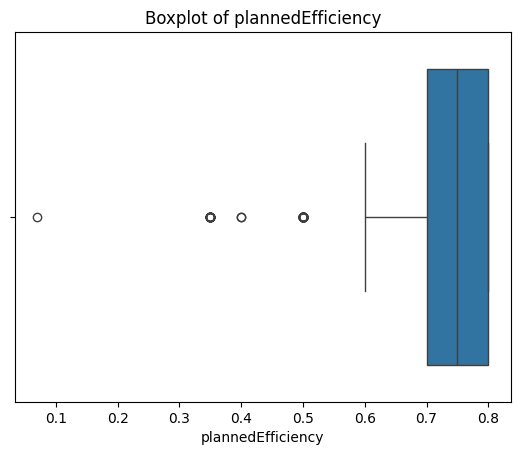

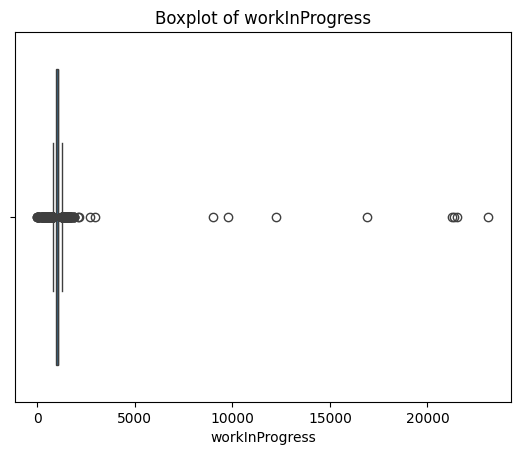

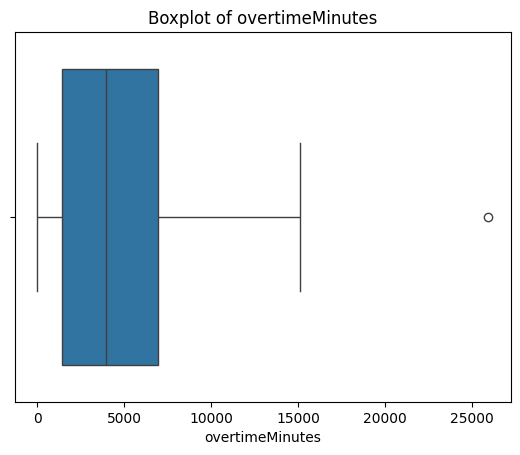

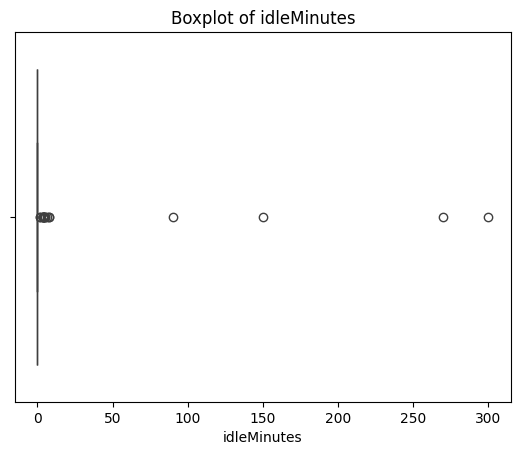

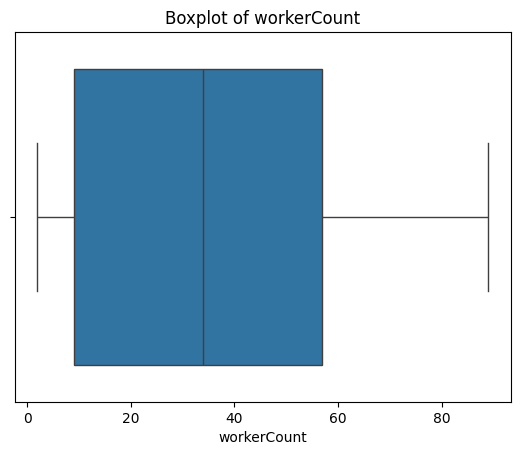

In [ ]:
for col in num_features:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Outlier Handling**

In [ ]:
import numpy as np

In [ ]:
cap_columns = ['plannedEfficiency', 'workInProgress']

In [ ]:

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))

    return df


In [ ]:
for col in cap_columns:
    df = cap_outliers(df, col)

In [ ]:

df = df[df['overtimeMinutes'] < 15000]


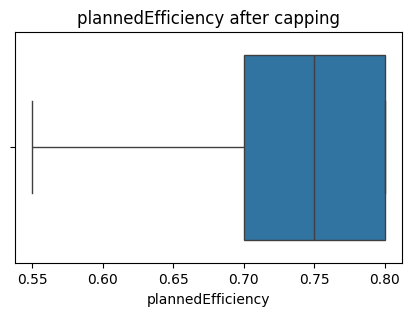

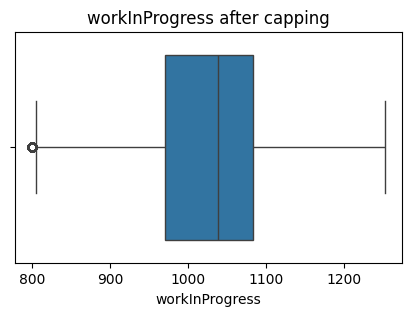

In [ ]:
for col in cap_columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"{col} after capping")
    plt.show()

In [ ]:
df['idleOccurred'] = (df['idleMinutes'] > 0).astype(int)

In [ ]:
df['idleOccurred'].describe()
df['idleOccurred'].value_counts().head()


idleOccurred
0    1175
1      18
Name: count, dtype: int64

### **Correlation matrix**

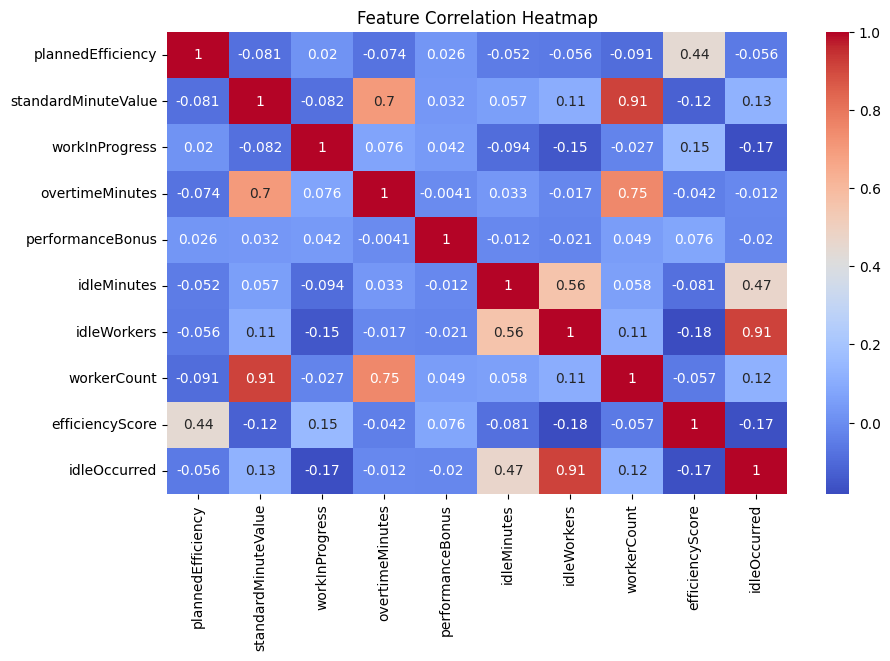

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.to_csv("../data/cleaned_manufacturing_data.csv", index=False)